In [1]:
# LSTM (Many to Many Multiple Numeric Features)
# =============================================

# https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras-part-2/

%tensorflow_version 2.x

import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.0.0'

In [0]:
# univariate lstm example
import tensorflow as tf
import numpy as np
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Flatten, RepeatVector, TimeDistributed
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import TensorBoard
# from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt
from time import time

In [19]:
# define dataset
X = list()
Y = list()
X1 = [x1 for x1 in range(5, 301, 5)]
X2 = [x2 for x2 in range(20, 316, 5)]
Y = [y for y in range(35, 331, 5)]

X = np.column_stack((X1, X2))
X[:3], Y[:3]

(array([[ 5, 20],
        [10, 25],
        [15, 30]]), [35, 40, 45])

In [0]:
X = np.array(X).reshape(20, 3, 2)
Y = np.array(Y).reshape(20, 3, 1)

X = X.astype('float32')
y = Y.astype('float32')

In [21]:
X[:3], y[:3]

(array([[[ 5., 20.],
         [10., 25.],
         [15., 30.]],
 
        [[20., 35.],
         [25., 40.],
         [30., 45.]],
 
        [[35., 50.],
         [40., 55.],
         [45., 60.]]], dtype=float32), array([[[35.],
         [40.],
         [45.]],
 
        [[50.],
         [55.],
         [60.]],
 
        [[65.],
         [70.],
         [75.]]], dtype=float32))

In [0]:
# X = tf.cast(X,tf.float32)
# y = tf.cast(y,tf.float32)

In [0]:
# %load_ext tensorboard
# tensorboard = TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=1)
# %tensorboard --logdir logs

In [0]:
# es = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=5, verbose=1, mode='max')

In [25]:
# define model

model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(3, 2), return_sequences=False)))
model.add(RepeatVector(3))
model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# history = model.fit(X, y, epochs=200, validation_split=0.2, batch_size=3, verbose=0)
history = model.fit(X, y, epochs=1000, validation_split=0.2, verbose=0)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection multiple                  82400     
_________________________________________________________________
repeat_vector_1 (RepeatVecto multiple                  0         
_________________________________________________________________
bidirectional_3 (Bidirection multiple                  240800    
_________________________________________________________________
time_distributed_1 (TimeDist multiple                  201       
Total params: 323,401
Trainable params: 323,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model
# model.fit(X, y, epochs=500, validation_split=0.2, verbose=1, callbacks=[tensorboard])
# history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=0, callbacks=[])

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


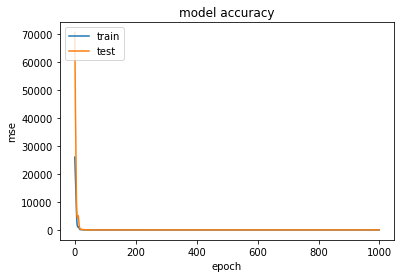

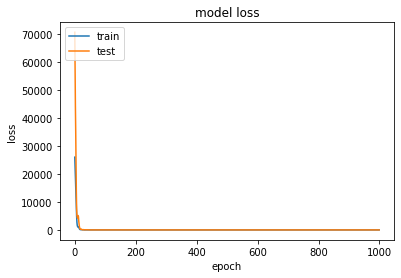

In [27]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# demonstrate prediction

X1 = [300, 305, 310]
X2 = [315, 320, 325]

test_input = np.column_stack((X1, X2))

test_input = test_input.reshape((1, 3, 2))
print(test_input)

test_input = test_input.astype('float32')
print(test_input)

print("expected : [330, 335, 340]")

yhat = model.predict(test_input, verbose=0)
print("yhat : ", yhat)

[[[300 315]
  [305 320]
  [310 325]]]
[[[300. 315.]
  [305. 320.]
  [310. 325.]]]
expected : [330, 335, 340]
yhat :  [[[331.02054]
  [336.37103]
  [341.31903]]]
